# Proyek Analisis Data: Bike Sharing
- **Nama:** Melanie Sayyidina Sabrina Refman
- **Email:** melanierefman84@gmail.com
- **ID Dicoding:** melanierefman

## Menentukan Pertanyaan Bisnis

- How does the bike sharing trend change from season to season?
- Are there any specific patterns in bike sharing based on working days or holidays?
- Is there a correlation between weather conditions and the bike rental rate?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

####tabel days_df

In [5]:
days_df = pd.read_csv("/data/day.csv", delimiter=",")

####tabel hour_df

In [6]:
hour_df = pd.read_csv("/data/hour.csv", delimiter=",")

### Assessing Data

#### tabel days_df

- Check missing values

In [7]:
days_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Check duplicate data

In [8]:
days_df.duplicated().sum()

0

Based on the inspection results on the days_df table, **there are no missing values** and **there are no duplicate data**.

- Check data type

In [9]:
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Based on the output above, there is a data type error in the **dteday column, which should be datetime instead of object**.

####tabel hour_df

- Check missing value

In [10]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Check duplicate data

In [11]:
hour_df.duplicated().sum()

0

Based on the inspection results on the hour_df table, **there are no missing values** and **there are no duplicate data**.

- Check data type

In [12]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Based on the output above, there is a data type error in the **dteday column, which should be datetime instead of object**.

### Cleaning Data

####tabel days_df

- Fixing data type

In [13]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

####tabel hour_df

- Fixing data type

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

- Summary statistics for all columns

In [ ]:
days_df.describe(include="all")

<ipython-input-16-82ba8947c7f3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  days_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


- Distribution of Bike Sharing by Season

In [15]:
season_map = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
days_df["season"] = days_df["season"].replace(season_map)
season_counts = days_df["season"].value_counts().sort_index()
print(season_counts)

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64


- Distribution of Bike Sharing by Year

In [16]:
year_map = {0: "2011", 1: "2012"}
days_df["yr"] = days_df["yr"].map(year_map)
year_counts = days_df["yr"].value_counts().sort_index()
print(year_counts)

2011    365
2012    366
Name: yr, dtype: int64


- Distribution of Bike Sharing by Month

In [17]:
days_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

- Distribution of Bike Sharing by Working Day

In [18]:
days_df["workingday"] = days_df["workingday"].replace({0: "Holiday", 1: "Working Day"})
print(days_df["workingday"].value_counts().sort_index())

Holiday        231
Working Day    500
Name: workingday, dtype: int64


- Distribution of Bike Sharing by Weather Condition

In [20]:
weather_map = {1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"}
days_df["weathersit"] = days_df["weathersit"].replace(weather_map)
print(days_df["weathersit"].value_counts().sort_index())

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64


- Distribution of Weather Variables

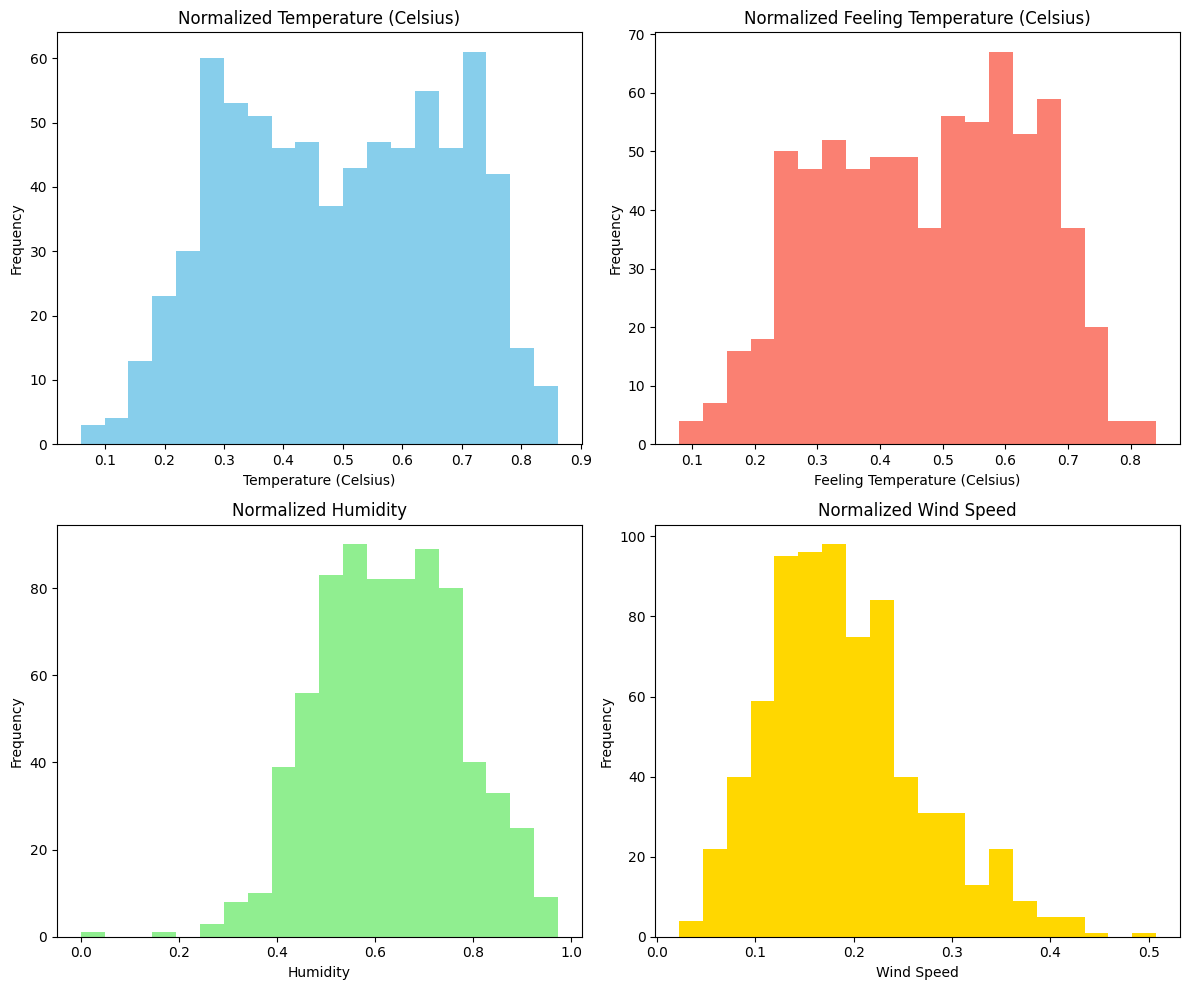

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].hist(days_df['temp'], bins=20, color='skyblue')
axes[0, 0].set_title('Normalized Temperature (Celsius)')
axes[0, 0].set_xlabel('Temperature (Celsius)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(days_df['atemp'], bins=20, color='salmon')
axes[0, 1].set_title('Normalized Feeling Temperature (Celsius)')
axes[0, 1].set_xlabel('Feeling Temperature (Celsius)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(days_df['hum'], bins=20, color='lightgreen')
axes[1, 0].set_title('Normalized Humidity')
axes[1, 0].set_xlabel('Humidity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(days_df['windspeed'], bins=20, color='gold')
axes[1, 1].set_title('Normalized Wind Speed')
axes[1, 1].set_xlabel('Wind Speed')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

- Correlation Heatmap of Numeric Variables

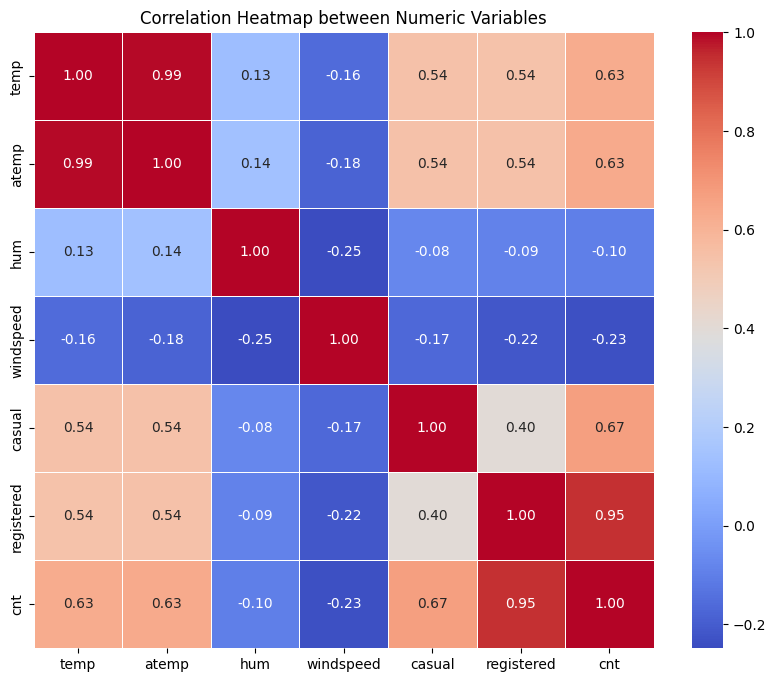

In [30]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = days_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Numeric Variables')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: How does the bike sharing trend change from season to season?

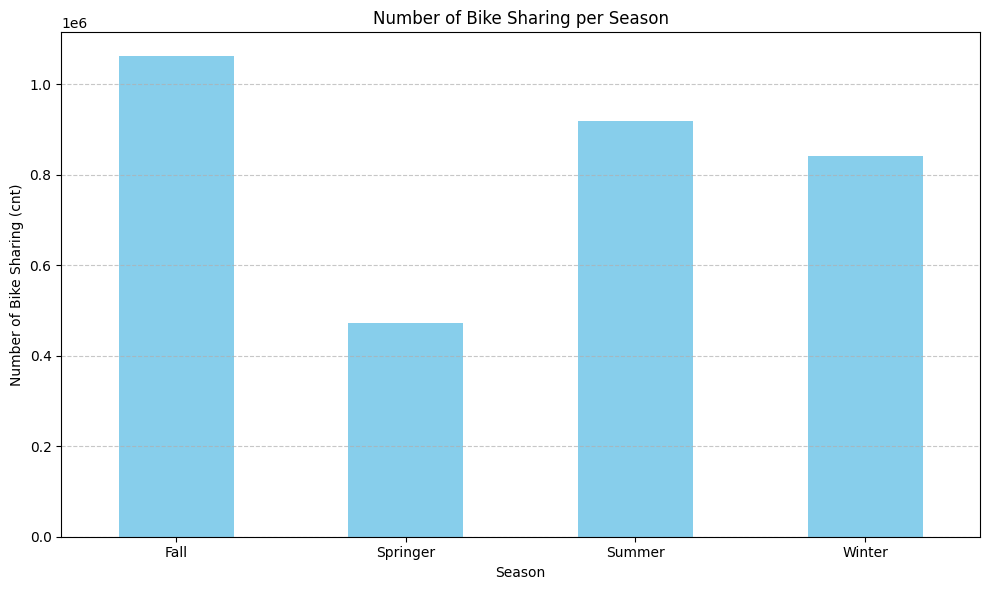

In [28]:
seosonal_data = days_df.groupby('season')['cnt'].sum()

plt.figure(figsize=(10, 6))
seosonal_data.plot(kind='bar', color='skyblue')

plt.xlabel('Season')
plt.ylabel('Number of Bike Sharing (cnt)')
plt.title('Number of Bike Sharing per Season')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Are there any specific patterns in bike sharing based on working days or holidays?

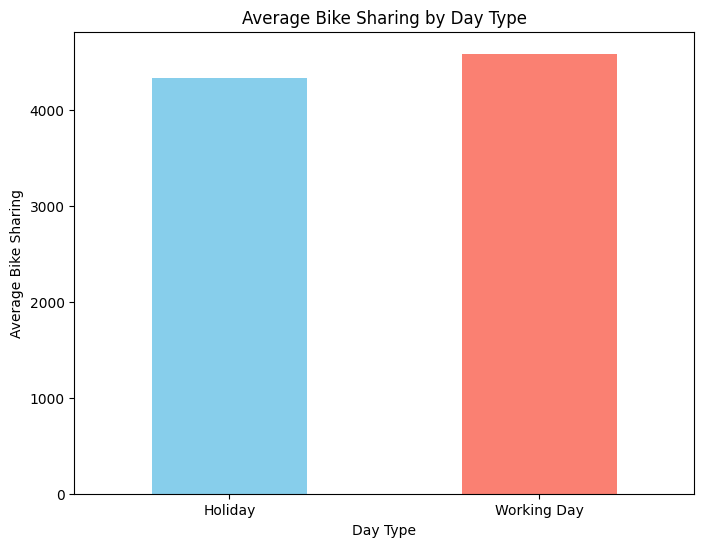

In [26]:
rentals_by_day_type = days_df.groupby(['workingday'])['cnt'].mean()

plt.figure(figsize=(8, 6))
rentals_by_day_type.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Day Type')
plt.ylabel('Average Bike Sharing')
plt.title('Average Bike Sharing by Day Type')
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day'], rotation=0)

plt.show()

### Pertanyaan 3: Is there a correlation between weather conditions and the bike rental rate?


Correlation between weather conditions and bike sharing levels:
weather_Clear            0.252870
weather_Light Snow      -0.239958
weather_Mist + Cloudy   -0.172879
dtype: float64


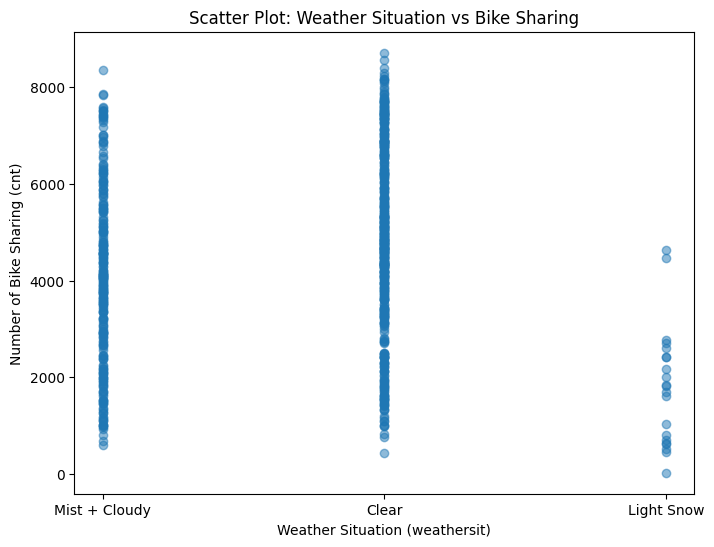

In [27]:
weather_dummies = pd.get_dummies(days_df['weathersit'], prefix='weather')

days_df = pd.concat([days_df, weather_dummies], axis=1)

weather_correlation = days_df.filter(regex='^weather_').corrwith(days_df['cnt'])

print("Correlation between weather conditions and bike sharing levels:")
print(weather_correlation)

plt.figure(figsize=(8, 6))
plt.scatter(days_df['weathersit'], days_df['cnt'], alpha=0.5)
plt.xlabel('Weather Situation (weathersit)')
plt.ylabel('Number of Bike Sharing (cnt)')
plt.title('Scatter Plot: Weather Situation vs Bike Sharing')
plt.show()


## Conclusion

- Based on the Number of Bike Sharing per Season table, there is a difference in the number of users using bike sharing services in each season. The highest bike rental usage occurs in the fall season, while the lowest occurs in the spring season. From this data, it can be concluded that the trend of using bike sharing services varies each season.
  
- Based on the Average Bike Sharing by Day Type table, the average usage of bike sharing services is higher on working days compared to holidays. This indicates a higher preference of users to use bike sharing services on working days.
  
- Based on the Scatter Plot: Weather Situation vs Bike Sharing, clear weather (weather_Clear) has a strong positive correlation with the bike sharing rate (cnt), meaning more people use bike sharing services when the weather is clear. Conversely, unfavorable weather conditions such as light snow (weather_Light Snow) and misty with cloudy weather (weather_Mist + Cloudy) have a negative correlation with the bike sharing rate (cnt), indicating fewer people use bike sharing services during bad weather.

In [ ]:
days_df.to_csv("/content/day_fixed.csv", index=False)